In [5]:
!pip3 install yfinance
!pip3 install matplotlib
!pip3 install scipy

     |████████████████████████████████| 12.4 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 4.4 MB/s eta 0:00:011
     |████████████████████████████████| 25.9 MB 386 kB/s eta 0:00:01


In [6]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [34]:
n_forward = 2
#The name of Stock - SPY
name = 'AAPL'
start_date = "2010-01-01"
end_date = "2020-06-29"

In [35]:
ticker = yfinance.Ticker(name)
data = ticker.history(interval="1d",start=start_date,end=end_date)
# The closed price two days ago. The minus shift means moving the series data avobe as much as minus value to compare future value to current value.
data['Forward Close'] = data['Close'].shift(-n_forward)

# The revenue from Forward Close which include Close price 2days after(future) to Current Close price.
data['Forward Return'] = (data['Forward Close'] - data['Close'])/data['Close']

- AAPL NVDA: No data found, symbol may be delisted


In [25]:
#data.head

<bound method NDFrame.head of               Open    High     Low   Close     Volume  Dividends  \
Date                                                               
2010-01-04   26.40   26.53   26.27   26.47  123432400        0.0   
2010-01-05   26.54   26.66   26.37   26.51  150476200        0.0   
2010-01-06   26.51   26.62   26.06   26.09  138040000        0.0   
2010-01-07   26.19   26.22   25.85   26.04  119282800        0.0   
2010-01-08   26.01   26.22   25.85   26.22  111902700        0.0   
...            ...     ...     ...     ...        ...        ...   
2020-06-22  351.34  359.46  351.15  358.87   33861300        0.0   
2020-06-23  364.00  372.38  362.27  366.53   53038900        0.0   
2020-06-24  365.00  368.79  358.52  360.06   48155800        0.0   
2020-06-25  360.70  365.00  357.57  364.84   34380600        0.0   
2020-06-26  364.41  365.32  353.02  353.63   51270100        0.0   

            Stock Splits  Forward Close  Forward Return  
Date                       

In [26]:
result = []
train_size = 0.6
for sma_length in range(20,500):
  # using rolling for movig average
  data['SMA'] = data['Close'].rolling(sma_length).mean()
  # adding input date when Close price greater than SMA price(moving averating as much SMA period)
  # data[input] has boolean value in other words 1 number value.
  data['input'] = [int(x) for x in data['Close'] > data['SMA']]
  
  #print(data.head())

  # dropping the na value
  df = data.dropna()
  # df.shape[0] shows the df's row count. it will be raito between training and test.
  training = df.head(int(train_size * df.shape[0]))
  test = df.tail(int((1 - train_size) * df.shape[0]))
  
  # in case of input == 1, tr_returns get forward retrun price.
  tr_returns = training[training['input'] == 1]['Forward Return']
  test_returns = test[test['input'] == 1]['Forward Return']
  mean_forward_return_training = tr_returns.mean()
  mean_forward_return_test = test_returns.mean()
  pvalue = ttest_ind(tr_returns,test_returns,equal_var=False)[1]
 
  result.append({
      'sma_length':sma_length,
      'training_forward_return': mean_forward_return_training,
      'test_forward_return': mean_forward_return_test,
      'p-value':pvalue
  })

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

             Open   High    Low  Close     Volume  Dividends  Stock Splits  \
Date                                                                         
2010-01-04  26.40  26.53  26.27  26.47  123432400        0.0           0.0   
2010-01-05  26.54  26.66  26.37  26.51  150476200        0.0           0.0   
2010-01-06  26.51  26.62  26.06  26.09  138040000        0.0           0.0   
2010-01-07  26.19  26.22  25.85  26.04  119282800        0.0           0.0   
2010-01-08  26.01  26.22  25.85  26.22  111902700        0.0           0.0   

            Forward Close  Forward Return  SMA  input  
Date                                                   
2010-01-04          26.09       -0.014356  NaN      0  
2010-01-05          26.04       -0.017729  NaN      0  
2010-01-06          26.22        0.004983  NaN      0  
2010-01-07          25.98       -0.002304  NaN      0  
2010-01-08          25.69       -0.020214  NaN      0  
             Open   High    Low  Close     Volume  Dividends 

In [27]:
result.sort(key = lambda x : -x['training_forward_return'])

In [28]:
result[0]

{'sma_length': 167,
 'training_forward_return': 0.002985778592564268,
 'test_forward_return': 0.0027291051987735626,
 'p-value': 0.7984800394810443}

In [29]:
result[1]

{'sma_length': 166,
 'training_forward_return': 0.002975608621336561,
 'test_forward_return': 0.002748793305569015,
 'p-value': 0.8216267580239829}

In [30]:
best_sma = result[0]['sma_length']
data['SMA'] = data['Close'].rolling(best_sma).mean()

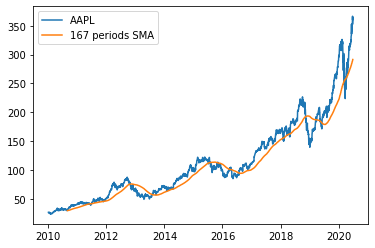

In [31]:
plt.plot(data['Close'],label=name)

plt.plot(data['SMA'],label = "{} periods SMA".format(best_sma))

plt.legend()
plt.show()